In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [71]:
acc = pd.read_csv("data/acc_fctr.csv")
acc.head()

,Unnamed: 0,player,Season,team,g,mpg,ppg,oreb,dreb,rpg,apg,tov,spg,bpg,fgm,ftm,fta,three_m,three_a,impact
0,1,Darius Leonard,2015,Wake Forest,32,17.4062,5.6875,1.0000,1.4688,2.4688,0.3125,0.4688,0.3125,0.3125,2.218750,0.343750,0.718750,0.906250,3.000000,3.86
1,2,Anthony Gill,2015,Virginia,34,25.2647,11.6176,3.0000,3.4706,6.4706,0.8529,1.1471,0.8529,0.4706,4.176471,3.264706,4.823529,0.000000,0.029412,17.26
2,3,Patrick Heckmann,2015,Boston College,32,29.3125,8.4375,1.1562,3.2188,4.3750,2.7188,1.9062,1.2500,0.3750,2.906250,1.843750,2.343750,0.781250,2.718750,9.15
3,4,Darion Atkins,2015,Virginia,33,23.9091,7.6364,2.2121,3.7576,5.9697,0.6970,1.1212,0.8182,1.0909,3.424242,0.787879,1.515152,0.000000,0.030303,10.51
4,5,Pat Connaughton,2015,Notre Dame,38,35.5526,12.5000,1.0789,6.3421,7.4211,1.5000,1.1579,0.7105,0.9474,4.368421,1.315789,1.684211,2.447368,5.789474,9.32


In [72]:
feature_columns = [
    "g",
    "mpg",
    "ppg",
    "oreb",
    "dreb",
    "apg",
    "tov",
    "spg",
    "bpg",
    "fgm",
    "ftm",
    "fta",
    "three_m",
    "three_a",
]

X = acc[feature_columns].values

# Linear Regression

In [73]:
lin_mod = LinearRegression()

x = acc[feature_columns]
y = acc["impact"]

lin_mod.fit(x, y)

y_pred = lin_mod.predict(x)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

r2, mse

(0.6157161498740104, 7.9997038156697675)

In [74]:
coef_df = pd.DataFrame(
    {"feature": feature_columns, "coefficient": lin_mod.coef_}
).sort_values("coefficient", ascending=False)

intercept = lin_mod.intercept_

coef_df, intercept

(    feature  coefficient
 12  three_m     1.718981
 8       bpg     1.652490
 7       spg     1.389640
 2       ppg     1.310676
 10      ftm     1.006287
 6       tov     0.880081
 3      oreb     0.843371
 4      dreb     0.382922
 0         g     0.353376
 5       apg    -0.055483
 1       mpg    -0.156896
 13  three_a    -1.295424
 11      fta    -1.543109
 9       fgm    -1.584662,
 -8.569049168767863)

In [ ]:
acc["impact"] = y_pred

In [78]:
acc.to_csv("acc_player_fct.csv")

# KMeans Clustering

In [30]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [31]:
inertias = []
silhouette_scores = []
davies_bouldin_scores = []
K_range = range(2, 50)

In [ ]:
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(x_scaled)

    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(x_scaled, kmeans_temp.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(x_scaled, kmeans_temp.labels_))

    print(
        f"k={k}: Inertia={kmeans_temp.inertia_:.2f}, "
        f"Silhouette={silhouette_scores[-1]:.3f}, "
        f"Davies-Bouldin={davies_bouldin_scores[-1]:.3f}"
    )

k=2: Inertia=13467.92, Silhouette=0.261, Davies-Bouldin=1.493
k=3: Inertia=10695.00, Silhouette=0.271, Davies-Bouldin=1.340
k=4: Inertia=9552.72, Silhouette=0.205, Davies-Bouldin=1.485
k=5: Inertia=8702.55, Silhouette=0.190, Davies-Bouldin=1.505
k=6: Inertia=8184.72, Silhouette=0.182, Davies-Bouldin=1.584
k=7: Inertia=7742.53, Silhouette=0.172, Davies-Bouldin=1.647
k=8: Inertia=7404.95, Silhouette=0.152, Davies-Bouldin=1.746
k=9: Inertia=7157.76, Silhouette=0.156, Davies-Bouldin=1.644
k=10: Inertia=6895.41, Silhouette=0.147, Davies-Bouldin=1.715
k=11: Inertia=6699.04, Silhouette=0.142, Davies-Bouldin=1.731
k=12: Inertia=6564.70, Silhouette=0.138, Davies-Bouldin=1.731
k=13: Inertia=6372.27, Silhouette=0.135, Davies-Bouldin=1.717
k=14: Inertia=6217.83, Silhouette=0.134, Davies-Bouldin=1.715
k=15: Inertia=6101.32, Silhouette=0.134, Davies-Bouldin=1.718
k=16: Inertia=5945.15, Silhouette=0.137, Davies-Bouldin=1.674
k=17: Inertia=5822.24, Silhouette=0.133, Davies-Bouldin=1.738
k=18: Inertia=

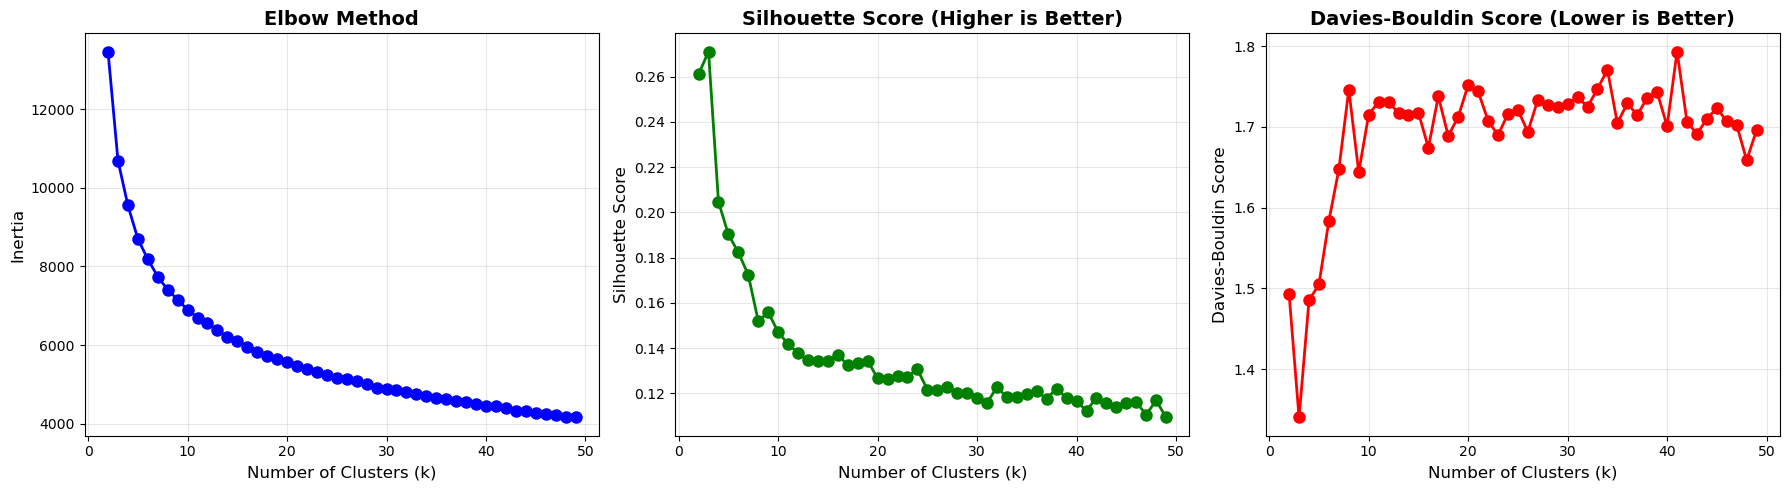

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Elbow Method
axes[0].plot(K_range, inertias, "bo-", linewidth=2, markersize=8)
axes[0].set_xlabel("Number of Clusters (k)", fontsize=12)
axes[0].set_ylabel("Inertia", fontsize=12)
axes[0].set_title("Elbow Method", fontsize=14, fontweight="bold")
axes[0].grid(True, alpha=0.3)

# Silhouette Score (higher is better)
axes[1].plot(K_range, silhouette_scores, "go-", linewidth=2, markersize=8)
axes[1].set_xlabel("Number of Clusters (k)", fontsize=12)
axes[1].set_ylabel("Silhouette Score", fontsize=12)
axes[1].set_title("Silhouette Score (Higher is Better)", fontsize=14, fontweight="bold")
axes[1].grid(True, alpha=0.3)

# Davies-Bouldin Score (lower is better)
axes[2].plot(K_range, davies_bouldin_scores, "ro-", linewidth=2, markersize=8)
axes[2].set_xlabel("Number of Clusters (k)", fontsize=12)
axes[2].set_ylabel("Davies-Bouldin Score", fontsize=12)
axes[2].set_title(
    "Davies-Bouldin Score (Lower is Better)", fontsize=14, fontweight="bold"
)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("clustering_metrics.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(x_scaled)

acc["cluster"] = clusters

In [ ]:
cluster_summary = acc.groupby("cluster")[feature_columns].mean()
cluster_summary

,g,mpg,ppg,oreb,dreb,rpg,apg,tov,spg,bpg,fgm,ftm,fta,three_m,three_a
cluster,,,,,,,,,,,,,,,
0,30.992537,30.004749,10.081340,0.569639,2.521813,3.091457,3.668404,2.018339,1.246692,0.209168,3.474339,2.046795,2.709576,1.083013,3.181169
1,31.861842,20.231540,6.358181,1.748278,3.047253,4.795535,0.694205,1.015963,0.530818,0.981978,2.474712,1.252209,1.946016,0.154781,0.539737
2,30.964286,28.216617,10.346677,0.622427,2.600108,3.222659,1.577021,1.155116,0.742046,0.251704,3.545610,1.474800,1.897832,1.778186,4.772538
3,30.209302,33.726440,16.556269,0.730122,3.429471,4.159357,4.082926,2.691817,1.487328,0.257590,5.516035,3.984573,5.101694,1.547264,4.601370
4,31.928571,31.468630,16.206323,2.621254,6.069293,8.690406,1.869681,2.049461,0.970616,1.156676,5.914055,3.655005,5.078364,0.721651,2.094857
5,22.716814,20.443571,5.988914,0.764979,2.169745,2.935078,1.341298,1.030093,0.652919,0.254054,2.094145,1.012636,1.450281,0.783311,2.349291
6,31.408163,27.237404,10.593327,2.588166,4.783596,7.371556,1.204150,1.491601,0.748464,1.221470,4.152421,2.087565,3.157908,0.192525,0.589042
7,32.595041,32.996768,15.096014,0.688499,3.278893,3.967487,2.604385,1.766026,1.004085,0.256855,5.117960,2.583130,3.207986,2.280808,6.110510
8,32.320197,19.597001,5.503104,0.563220,1.823250,2.386475,1.284490,0.967808,0.591681,0.197035,1.942386,0.869677,1.244368,0.743478,2.216798


In [ ]:
data_15 = pd.read_csv("data/barttorvik_data_15.csv")
data_16 = pd.read_csv("data/barttorvik_data_16.csv")
data_17 = pd.read_csv("data/barttorvik_data_17.csv")
data_18 = pd.read_csv("data/barttorvik_data_18.csv")
data_19 = pd.read_csv("data/barttorvik_data_19.csv")
data_20 = pd.read_csv("data/barttorvik_data_20.csv")
data_21 = pd.read_csv("data/barttorvik_data_21.csv")
data_22 = pd.read_csv("data/barttorvik_data_22.csv")
data_23 = pd.read_csv("data/barttorvik_data_23.csv")
data_24 = pd.read_csv("data/barttorvik_data_24.csv")
data_25 = pd.read_csv("data/barttorvik_data_25.csv")
data_26 = pd.read_csv("data/barttorvik_data_26.csv")


dfs = [
    data_15,
    data_16,
    data_17,
    data_18,
    data_19,
    data_20,
    data_21,
    data_22,
    data_23,
    data_24,
    data_25,
    data_26,
]

barttorvik = pd.concat(dfs, ignore_index=True)

In [45]:
barttorvik.to_csv("barttorvik_15_26.csv")